### Code Hist.

- CODE : KIER Data_전처리 (결측 제거)  
- DATE  
&ensp; 2023-10-12 Created  
&ensp; 2023-11-21 Code 최신화  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 기존 모듈화된 함수 사용  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2) 기존 KIER 변환 관련 코드를 모두 통합  
&ensp; 2024-01-19 Code 개선  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 공통코드 사용 경로 개선, Raw로 저장  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2) HOT (온수 사용량) 전용 Code 작성  
&ensp; 2024-01-30 Code 개선 후 백업  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 순시사용량 보간 코드 작성 (미완)  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2) 백업 후 코드 최적화    
&ensp; 2024-02-05 Code 개선  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 순시사용량 보간 코드 작성 (Method 02 1차 완성)  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; A. 순시값을 보간하는 방법은 3가지로 제안 가능  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; a) 단순 Linear 보간 (앞뒤 평균치)  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [Not Recommanded] 매우 긴 구간의 결측을 커버하기에 부적절  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; (양 끝이 0인 경우, 해당 구간을 제대로 보간 불가)      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; b) 직전 주 동일시간 사용량  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 나쁘지 않은 방법이지만, 직전 주의 데이터가 존재하지 않을 경우 보간 불가  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(데이터 상 첫 주 케이스 등)  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; c-1) 해당 동일년도/동일월/동일요일/동일시간의 평균 사용량  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 나쁘지 않은 방법이지만, 과정이 조금 복잡해짐  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; c-2) 해당 동일 일시의 348 세대의 평균 사용량  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; c-1보다 기대되는 적용 데이터량이 많음.  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 한파/폭염/우천 등 예외적인 날씨에 따른 사용량 변동의 영향이 적어질 것으로 판단.  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; B. 순시값을 보간하기 전 단계  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; a) Resample시, 시간이 NaN인 구간은 그 간격에서 비어있는 행이다.  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 해당 행의 순시값을 NaN으로 처리   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; b-1) 시점 n의 적산량이 0이고 시점 n + 1의 적산량이 정상 경우  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 해당 행의 순시값을 NaN으로 처리  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; b-2) 시점 n의 순시량이 음수인 경우  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 해당 행의 순시값을 NaN으로 처리  
&ensp; 2024-02-07 Code 개선  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1) 결측 처리 부분 정확도 개선  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2) Raw Data 상 결측치가 15% 이상일 경우, 해당 데이터를 사용하지 않는 부분 추가  

- DESC  
&ensp; : int_Domain 코드의 변경에 따라,   
&emsp; KIER 에너지 사용량 데이터를 동/층/세대별로 분리    

&emsp; 또한, Raw Data과 세대별 데이터 추출 단계에서,  
&emsp; 아래와 같은 작업 진행  

&emsp; [수행 작업]  
&emsp; 1) Date Column에 대한 유효성 검사 및 이상 Data에 대한 소거  
&emsp; 1-1) Datetime 유효성 확인  
&emsp; 1-2) Datetime 이상치 제거  
&emsp; 2) HOUSE_ID_HO의 해시값을 int_house_num으로 변경 (용량 절감 목적)  
- DATA  
1) Period :   
2) Interval :   
- Link  
&ensp; : 

## 01. Code

### 01-01. Init

#### 01-01-01. Init_Module Import

#### Module import

In [1]:
#region Basic_Import
## Basic
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.path.dirname(os.path.abspath('__file__'))
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from pandas import DataFrame, Series

import math, random

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score, rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

## 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm
import tqdm

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [2]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    from keras.models import Sequential, load_model
    from keras_flops import get_flops
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

tf.debugging.set_log_device_placement(True)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU만 사용하도록 제한
  try:
    print('Using GPU')
    tf.config.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)
else : 
  print('Using CPU')

Using GPU


In [4]:
## Import_Local
from Src_Dev_Common import DEV_Common_Data_Datetime as com_date
# from Src_Dev_Common import DEV_KASI_Holiday as com_Holi
# from Src_Dev_Common import DEV_Common_Data_Analysis as com_Analysis
from Src_Dev_Common import DEV_Common_Data_Preprocessing as com_Prep
# from Src_Dev_Common import DEV_Common_Model as com_Model
# from Src_Dev_Common import DEV_Common_Data_Visualization as com_Visual
# from Src_Dev_Common import DEV_KMA_Weather_ASOS as com_ASOS
# from Src_Dev_Common import DEV_KDHC_Usage as com_KDHC
# from Src_Dev_Common import DEV_KIER_Usage as com_KIER

### 01-01-02. Config (Directory, Params)

In [5]:
## Init_config
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = "1"
random.seed(SEED)

In [6]:
## Define Todate str
str_now_ymd = pd.datetime.now().date()
str_now_y, str_now_m, str_now_d = pd.datetime.now().year, pd.datetime.now().month, pd.datetime.now().day
str_now_hr, str_now_min = pd.datetime.now().hour, pd.datetime.now().minute

print(pd.datetime.now())
print(str(str_now_y) + " / " + str(str_now_m)  + " / " + str(str_now_d))
print(str(str_now_hr) + " : " + str(str_now_min))

2024-07-04 10:54:43.738745
2024 / 7 / 4
10 : 54


In [7]:
## Dict_Domain
dict_domain = {0:"ELEC", 1:"HEAT", 2:"WATER", 3:"HOT_HEAT", 4:"HOT_FLOW", 5:"GAS"} ## GAS는 사용하지 않음.
int_domain = 3
str_domain = str(dict_domain[int_domain])

dict_col_accu = {0 : "ACTUAL_ACCU_EFF" ## ELEC
                 , 1 : "ACCU_HEAT" ## HEAT
                 , 2 : "ACCU_FLOW" ## WATER
                 , 3 : "ACCU_HEAT" ## HOT 열량
                 , 4 : "ACCU_FLOW" ## HOT 유량
                 , 5 : "ACCU_FLOW" ## GAS
                 }
str_col_accu = str(str_domain + "_" + str(dict_col_accu[int_domain]))

dict_col_inst = {0 : "INST_EFF" ## ELEC_INST_EFF
                , 1 : "INST_HEAT" ## HEAT_INST_HEAT
                , 2 : "INST_FLOW" ## WATER_INST_FLOW
                , 3 : "INST" ## HOT_HEAT_INST
                , 4 : "INST" ## HOT_FLOW_INST
                , 5 : "INST_FLOW" ## GAS_INST_FLOW
                } 
str_col_inst = str(str_domain + "_" + str(dict_col_inst[int_domain]))

## Directory Root
str_dirData = "../data/data_Energy_KIER/"
str_dir_raw = '../data/data_Energy_KIER/KIER_0_Raw/'
str_dirName_bld = '../data/data_Energy_KIER/KIER_1_BLD/'
str_dirName_h = '../data/data_Energy_KIER/KIER_2_H_' + str_domain + '/'

## File
str_fileRaw = str('KIER_RAW_' + str_domain + '_2024-06-07.csv')
str_fileRaw_hList = str('KIER_hList_Common.csv') 

print(str(os.listdir(str_dirData)) + "\n")
print(os.listdir(str_dirName_h))

['.ipynb_checkpoints', 'BS_CONFIGURATION_202309251452.csv', 'DATE_1M_2023-10-20.csv', 'KIER 전처리 현황_2024-06-25.xlsx', 'KIER_0_Raw', 'KIER_1_BLD', 'KIER_2_H_ELEC', 'KIER_2_H_GAS', 'KIER_2_H_HEAT', 'KIER_2_H_HOT_FLOW', 'KIER_2_H_HOT_HEAT', 'KIER_2_H_WATER', 'KIER_ASOS_WEATHER_DAILY_202309251521.csv', 'KIER_ASOS_WEATHER_HOUR_202309251521.csv', 'KIER_DATA_OLD', 'KIER_ETC', 'KIER_hList_Comparison_2024-06-26.xlsx', 'KIER_List_Table_Column_2023-09-25.xlsx', 'KIER_Query_2023-09-25.txt', 'KMA_ASOS_119_2010_2023_1st_to CSV.csv', '[IITP] 데이터 테이블 정리 (공유 원본).docx']

['KIER_HOT_HEAT_561-1-1_ACCU_01_Raw.csv', 'KIER_HOT_HEAT_561-1-1_INST_01_10min.csv', 'KIER_HOT_HEAT_561-1-2_ACCU_01_Raw.csv', 'KIER_HOT_HEAT_561-1-2_INST_01_10min.csv', 'KIER_HOT_HEAT_561-1-3_ACCU_01_Raw.csv', 'KIER_HOT_HEAT_561-1-3_INST_01_10min.csv', 'KIER_HOT_HEAT_561-1-4_ACCU_01_Raw.csv', 'KIER_HOT_HEAT_561-1-4_INST_01_10min.csv', 'KIER_HOT_HEAT_561-10-1_ACCU_01_Raw.csv', 'KIER_HOT_HEAT_561-10-1_INST_01_10min.csv', 'KIER_HOT_HEAT_561

In [8]:
## "KIER_01-01_Data_hList.ipynb"로부터 만들어진 Bld/F/H List
df_kier_hList = pd.read_csv(str_dir_raw + str_fileRaw_hList, index_col = 0)
list_h_id = df_kier_hList['HOUSE_ID'].drop_duplicates()
print(df_kier_hList.shape, " /// ", df_kier_hList.columns)
df_kier_hList

(348, 5)  ///  Index(['HOUSE_ID_DONG', 'HOUSE_ID_HO_PRE', 'HOUSE_ID_HO_INT', 'HOUSE_ID',
       'HOUSE_ID_HO'],
      dtype='object')


,HOUSE_ID_DONG,HOUSE_ID_HO_PRE,HOUSE_ID_HO_INT,HOUSE_ID,HOUSE_ID_HO
1,561,1,1,561-1-1,NkI4M0EzNDYxQTE1MDJERjM4NURERTcyRjdGQTJDMDU=
2,561,1,2,561-1-2,ODBEOTE0QzZCMjg5RUMzNTRBQjM1NjE0RDNBNDE0NzU=
3,561,1,3,561-1-3,QTUwRUJDQTlBMkZENUQyNjg0RDRGREVFMTNGNDI3NUY=
4,561,1,4,561-1-4,RkRCQzY4OTlCMTRDQjgzNUZBREE3Njc2MkM2MUM2QjI=
5,561,2,1,561-2-1,MTQxNkQ1RDAzOTE5NTM5RUM3MzlDQkY3RTI2NERCQTM=
...,...,...,...,...,...
344,563,23,2,563-23-2,QkJCQjQwOThFNjgwNjUwQzJGRUJFNDlCNTREOEUxNDU=
345,563,23,3,563-23-3,QUJENzFFMEFDRjM4MjY3NTRDQzJCRjdDNUQ3ODA0N0Y=
346,563,23,4,563-23-4,RUVENzZDNTc4MUY4NDg5MUREQjZEOUM1M0Q2RjYzMDE=
347,563,24,1,563-24-1,NEVENDc1OTFFNDBBRjBDQzkzMTlEMDgzMkMzMkZFQTg=


## 01-02. Data Load (df_raw)

### 01-02-01. KIER (Energy Usage)

### 순시사용량

In [9]:
str_file = str('KIER_' + str_domain + '_INST_01_10min.csv')
df_tmp = pd.read_csv(str_dirName_h + str_file, index_col = 0)
df_tmp['METER_DATE'] = pd.to_datetime(df_tmp['METER_DATE'])

list_tar_col = df_tmp.columns[0:]
df_tmp = df_tmp.reset_index()[list_tar_col] ## reset_index로 인해 발생한 index행 제거

In [10]:
## 정상적인 Time Period 외의 데이터는 삭제 (2022-07-17 ~ 2024-06-05)
df_period_tmp = pd.read_csv(str_dir_raw + "KIER_TIME_PERIOD.csv", index_col = 0)
df_period_tmp['METER_DATE'] = pd.to_datetime(df_period_tmp['METER_DATE'])

df_tmp = pd.merge(df_period_tmp['METER_DATE'], df_tmp, on = ['METER_DATE'], how = "left")
df_tmp

,METER_DATE,day_of_the_week,YEAR,MONTH,DAY,HOUR,MINUTE,code_day_of_the_week,HOT_HEAT_INST_561-1-1,HOT_HEAT_INST_561-1-2,...,HOT_HEAT_INST_563-22-5,HOT_HEAT_INST_563-22-6,HOT_HEAT_INST_563-23-1,HOT_HEAT_INST_563-23-2,HOT_HEAT_INST_563-23-3,HOT_HEAT_INST_563-23-4,HOT_HEAT_INST_563-24-1,HOT_HEAT_INST_563-24-2,MEAN_OF_INST,SUM_OF_INST
0,2022-07-17 23:00:00,Sunday,2022,7,17,23,0,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.4285714286,2075.0000000000
1,2022-07-17 23:10:00,Sunday,2022,7,17,23,10,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.6522521739,2085.0018000000
2,2022-07-17 23:20:00,Sunday,2022,7,17,23,20,6,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,6.0725000000,2095.0125000000
3,2022-07-17 23:30:00,Sunday,2022,7,17,23,30,6,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0001000000,0.0000000000,0.0000000000,0.0000000000,6.1192122093,2105.0090000000
4,2022-07-17 23:40:00,Sunday,2022,7,17,23,40,6,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,6.1842339181,2115.0080000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99166,2024-06-05 14:40:00,Wednesday,2024,6,5,14,40,2,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0001000000,0.0000000000,0.0000000000,5.9403772727,2091.0128000000
99167,2024-06-05 14:50:00,Wednesday,2024,6,5,14,50,2,0.0000000000,0.0000000000,...,0.0000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.9786461538,2101.0032000000
99168,2024-06-05 15:00:00,Wednesday,2024,6,5,15,0,2,0.0000000000,0.0000000000,...,0.0000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7692542735,2052.0055000000
99169,2024-06-05 15:10:00,Wednesday,2024,6,5,15,10,2,0.0000000000,0.0000000000,...,0.0000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1078941176,2062.0104000000


(99171, 358)  ///  Index(['METER_DATE', 'day_of_the_week', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'code_day_of_the_week', 'HOT_HEAT_INST_561-1-1',
       'HOT_HEAT_INST_561-1-2',
       ...
       'HOT_HEAT_INST_563-22-5', 'HOT_HEAT_INST_563-22-6',
       'HOT_HEAT_INST_563-23-1', 'HOT_HEAT_INST_563-23-2',
       'HOT_HEAT_INST_563-23-3', 'HOT_HEAT_INST_563-23-4',
       'HOT_HEAT_INST_563-24-1', 'HOT_HEAT_INST_563-24-2', 'MEAN_OF_INST',
       'SUM_OF_INST'],
      dtype='object', length=358)
METER_DATE                   0
day_of_the_week              0
YEAR                         0
MONTH                        0
DAY                          0
                          ... 
HOT_HEAT_INST_563-23-4    3460
HOT_HEAT_INST_563-24-1    3497
HOT_HEAT_INST_563-24-2    3418
MEAN_OF_INST                 0
SUM_OF_INST                  0
Length: 358, dtype: int64


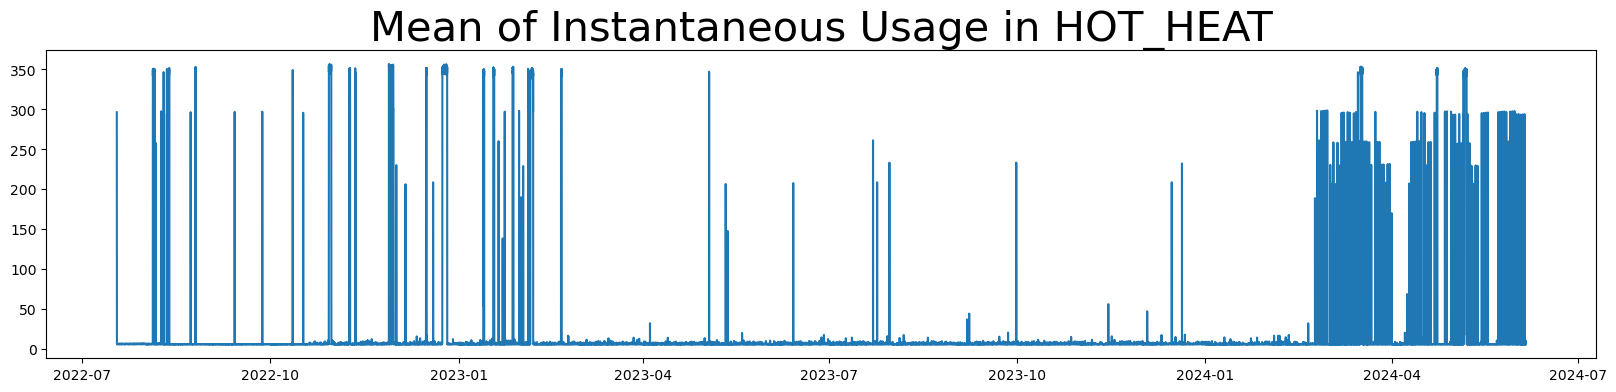

In [11]:
print(df_tmp.shape, " /// ", df_tmp.columns)
print(df_tmp.isna().sum())
# print(df_tmp.head(5))

plt.figure(figsize=(20,4))
plt.plot(df_tmp['METER_DATE'], df_tmp['MEAN_OF_INST'])
plt.title('Mean of Instantaneous Usage in ' + str_domain, fontsize=30)
plt.show()

In [12]:
## 순시사용량이 음수인 경우 삭제
cnt_minus = 0
list_col_usage = list(df_tmp.columns[8:-2])

for i in range(0, len(df_tmp)) : 
    for col_tar in list_col_usage:
        if df_tmp[col_tar][i] < 0 : 
            print(col_tar, ' ///', df_tmp[col_tar][i])
            print(df_tmp[col_tar][i])
            cnt_minus = cnt_minus + 1
            df_tmp[col_tar][i] = np.nan

print(cnt_minus)

## 순시 사용량의 합계 및 평균 Column을 갱신
df_tmp['MEAN_OF_INST'] = df_tmp[list_col_usage].mean(axis = 1)
df_tmp['SUM_OF_INST'] = df_tmp[list_col_usage].sum(axis = 1)

0


(99171, 358)  ///  Index(['METER_DATE', 'day_of_the_week', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'code_day_of_the_week', 'HOT_HEAT_INST_561-1-1',
       'HOT_HEAT_INST_561-1-2',
       ...
       'HOT_HEAT_INST_563-22-5', 'HOT_HEAT_INST_563-22-6',
       'HOT_HEAT_INST_563-23-1', 'HOT_HEAT_INST_563-23-2',
       'HOT_HEAT_INST_563-23-3', 'HOT_HEAT_INST_563-23-4',
       'HOT_HEAT_INST_563-24-1', 'HOT_HEAT_INST_563-24-2', 'MEAN_OF_INST',
       'SUM_OF_INST'],
      dtype='object', length=358)
METER_DATE                   0
day_of_the_week              0
YEAR                         0
MONTH                        0
DAY                          0
                          ... 
HOT_HEAT_INST_563-23-4    3460
HOT_HEAT_INST_563-24-1    3497
HOT_HEAT_INST_563-24-2    3418
MEAN_OF_INST              1654
SUM_OF_INST                  0
Length: 358, dtype: int64


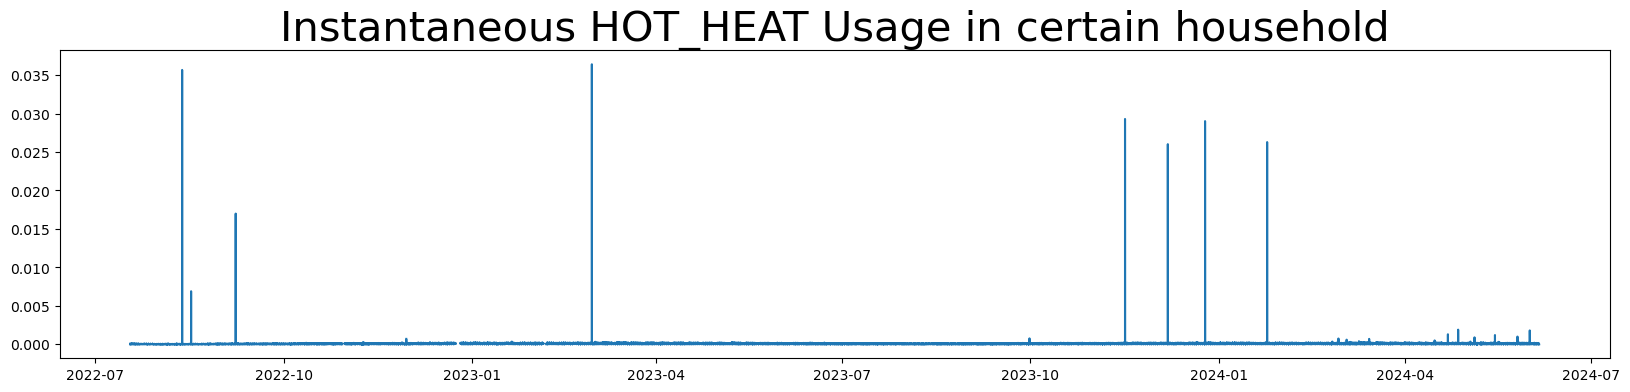

In [13]:
print(df_tmp.shape, " /// ", df_tmp.columns)
print(df_tmp.isna().sum())
# print(df_tmp.head(5))

plt.figure(figsize=(20,4))
plt.plot(df_tmp['METER_DATE'], df_tmp['MEAN_OF_INST'])
plt.title('Instantaneous ' + str_domain + ' Usage in certain household', fontsize=30)
plt.show()

In [14]:
# df_tmp[['METER_DATE', 'MEAN_OF_INST', 'SUM_OF_INST']].to_csv(str_dir_raw + "KIER_TIME_PERIOD.csv")

#### 1차 보간 : 평균 대치법 (동일 시간대 전체 세대의 평균 순시 사용량)

METER_DATE                   0
day_of_the_week              0
YEAR                         0
MONTH                        0
DAY                          0
                          ... 
HOT_HEAT_INST_563-23-4    1654
HOT_HEAT_INST_563-24-1    1654
HOT_HEAT_INST_563-24-2    1654
MEAN_OF_INST              1654
SUM_OF_INST                  0
Length: 358, dtype: int64
           METER_DATE day_of_the_week  YEAR  MONTH  DAY  HOUR  MINUTE  \
0 2022-07-17 23:00:00          Sunday  2022      7   17    23       0   
1 2022-07-17 23:10:00          Sunday  2022      7   17    23      10   
2 2022-07-17 23:20:00          Sunday  2022      7   17    23      20   
3 2022-07-17 23:30:00          Sunday  2022      7   17    23      30   
4 2022-07-17 23:40:00          Sunday  2022      7   17    23      40   

   code_day_of_the_week  HOT_HEAT_INST_561-1-1  HOT_HEAT_INST_561-1-2  ...  \
0                     6           0.0000000000           0.0000000000  ...   
1                     6           0.00

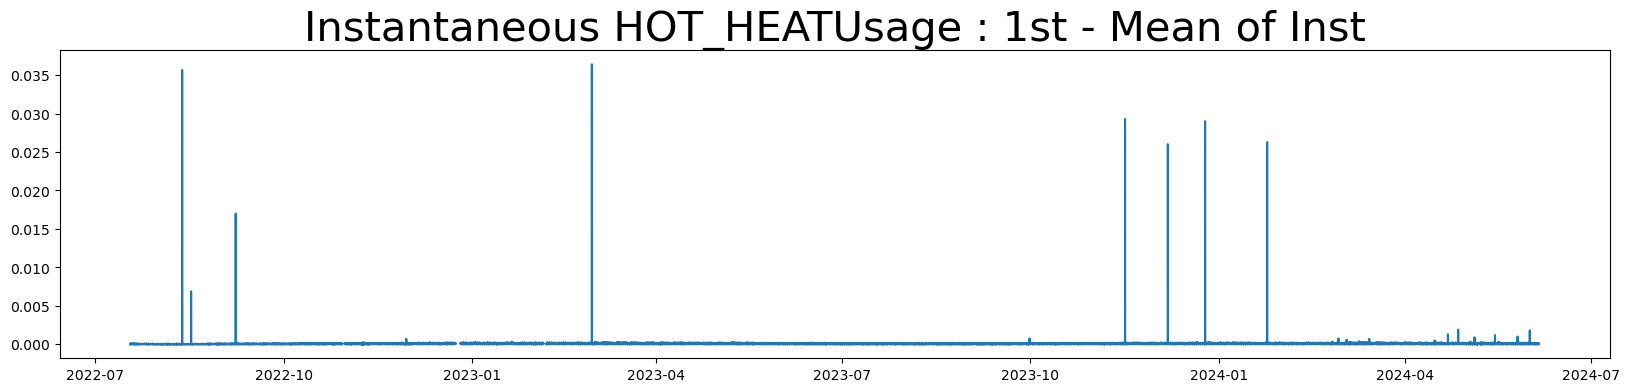

In [15]:
for i in range(0, len(df_tmp)) : df_tmp.loc[i] = df_tmp.loc[i].fillna(df_tmp['MEAN_OF_INST'].loc[i])

## 순시 사용량의 합계 및 평균 Column을 갱신
df_tmp['MEAN_OF_INST'] = df_tmp[list_col_usage].mean(axis = 1)
df_tmp['SUM_OF_INST'] = df_tmp[list_col_usage].sum(axis = 1)

## 마지막값이 0이므로 제외
df_tmp = df_tmp[:-1]

str_file = 'KIER_' + str_domain + '_INST_01_MeanIntp.csv'
df_tmp.to_csv(str_dirName_h + str_file)

print(df_tmp.isna().sum())
print(df_tmp.head(5))
plt.figure(figsize=(20,4))
plt.plot(df_tmp['METER_DATE'], df_tmp['MEAN_OF_INST'])
plt.title('Instantaneous ' + str_domain + 'Usage : 1st - Mean of Inst', fontsize=30)
plt.show()

In [16]:
str_file = 'KIER_' + str_domain + '_INST_02_MeanInterpolated.csv'
df_tmp = pd.read_csv(str_dirName_h + str_file, index_col = 0)

#### 2차 보간 : 선형 보간

모든 값이 NaN이어서 평균 순시 사용량이 계산되지 않은 경우 존재 (ELEC 기준 약 1,372건)  
해당 부분은 단순 선형 보간을 진행

In [17]:
## 사용량 컬럼에 대한 2차 보간 진행 (선형 보간)
df_linear_tmp, df_spline_tmp, df_polynomial_tmp, df_cubic_tmp = df_tmp.copy(), df_tmp.copy(), df_tmp.copy(), df_tmp.copy()
df_linear_tmp['MEAN_OF_INST'] = df_linear_tmp['MEAN_OF_INST'].interpolate('linear')
df_spline_tmp['MEAN_OF_INST'] = df_spline_tmp['MEAN_OF_INST'].interpolate('spline', order = 3) ## 3차 다항식 스플라인
# df_polynomial_tmp['MEAN_OF_INST'] = df_polynomial_tmp['MEAN_OF_INST'].interpolate('polynomian')
# df_cubic_tmp['MEAN_OF_INST'] = df_cubic_tmp['MEAN_OF_INST'].interpolate('cubicspline')

str_file = 'KIER_' + str_domain + '_INST_02-01_SingleLinear.csv'
df_linear_tmp.to_csv(str_dirName_h + str_file)

str_file = 'KIER_' + str_domain + '_INST_02-02_Spline.csv'
df_spline_tmp.to_csv(str_dirName_h + str_file)

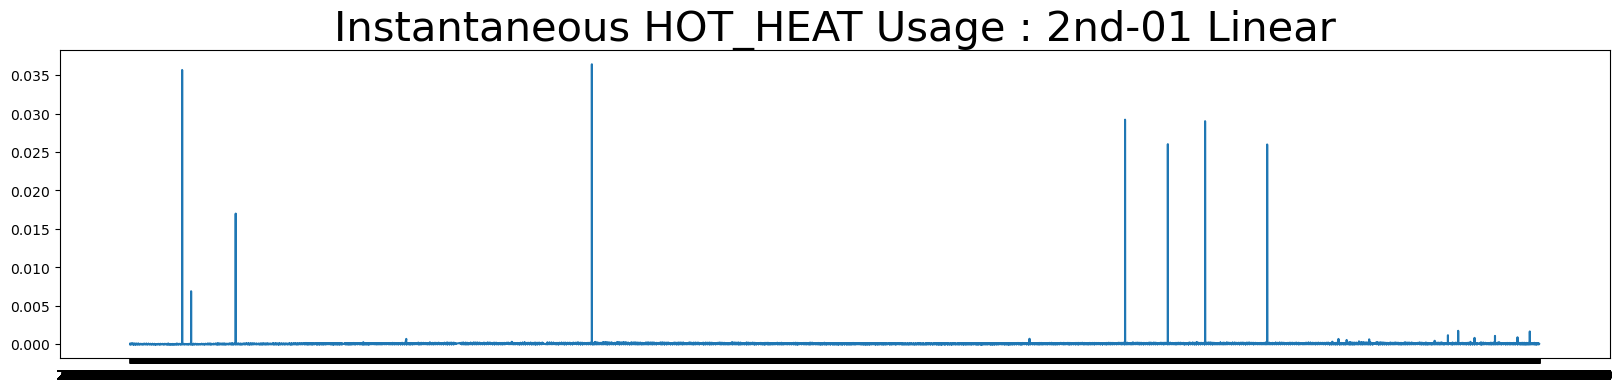

In [18]:
plt.figure(figsize=(20,4))
plt.plot(df_linear_tmp['METER_DATE'], df_linear_tmp['MEAN_OF_INST'])
plt.title('Instantaneous ' + str_domain + ' Usage : 2nd-01 Linear', fontsize=30)
plt.show()

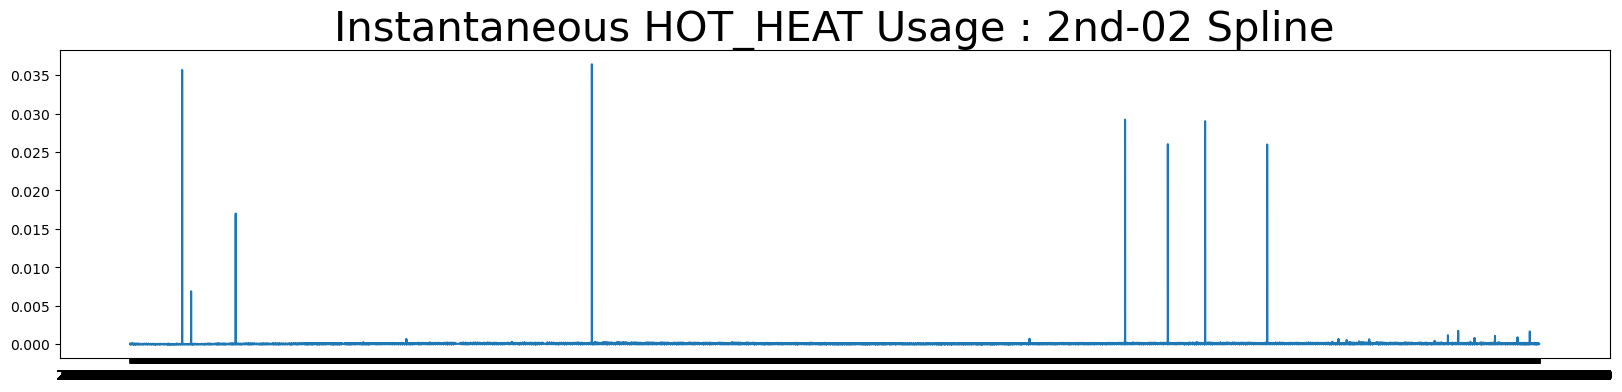

In [19]:
plt.figure(figsize=(20,4))
plt.plot(df_spline_tmp['METER_DATE'], df_spline_tmp['MEAN_OF_INST'])
plt.title('Instantaneous ' + str_domain + ' Usage : 2nd-02 Spline', fontsize=30)
plt.show()

In [20]:
str_file = 'KIER_' + str_domain + '_INST_02-01_SingleLinear.csv'
df_linear_tmp = pd.read_csv(str_dirName_h + str_file, index_col = 0)

str_file = 'KIER_' + str_domain + '_INST_02-02_Spline.csv'
df_spline_tmp = pd.read_csv(str_dirName_h + str_file, index_col = 0)

#### 이상치 제거 : IQR 방식으로 이상치 완화

In [21]:
## 여기서 IQR방식으로 전처리
list_col_usage = list(df_tmp.columns[8:-2])
for tar_col in list_col_usage:
    print(tar_col)
    df_h_tmp = df_tmp[['METER_DATE', tar_col]].copy()
    df_h_tmp = com_Prep.del_outlier_Usages(df_h_tmp, tar_col, 10)
    df_tmp[tar_col] = df_h_tmp[tar_col]

HOT_HEAT_INST_561-1-1
===============  IQR Range =============== 
0.0
0.0
0.0
nan
0.0
0.0
===============  IQR Range =============== 
cnt_outlier = 8724
===============  IQR Range =============== 
0.0
0.0
0.0
nan
0.0
0.0
===============  IQR Range =============== 
cnt_outlier = 7301
===============  IQR Range =============== 
0.0
0.0
0.0
nan
0.0
0.0
===============  IQR Range =============== 
cnt_outlier = 7300
===============  IQR Range =============== 
0.0
0.0
0.0
nan
0.0
0.0
===============  IQR Range =============== 
cnt_outlier = 7299
===============  IQR Range =============== 
0.0
0.0
0.0
nan
0.0
0.0
===============  IQR Range =============== 
cnt_outlier = 7299
===============  IQR Range =============== 
0.0
0.0
0.0
nan
0.0
0.0
===============  IQR Range =============== 
cnt_outlier = 7299
===============  IQR Range =============== 
0.0
0.0
0.0
nan
0.0
0.0
===============  IQR Range =============== 
cnt_outlier = 7299
===============  IQR Range =============== 
0.0
0.0
0.0
nan
0

IndexError: single positional indexer is out-of-bounds

In [ ]:
str_file = 'KIER_' + str_domain + '_INST_03_IQR.csv'
df_tmp.to_csv(str_dirName_h + str_file)

In [ ]:
str_file = 'KIER_' + str_domain + '_INST_01_10min.csv'
df_tmp_00 = pd.read_csv(str_dirName_h + str_file, index_col = 0)
str_file = 'KIER_' + str_domain + '_INST_01_MeanIntp.csv'
df_tmp_01 = pd.read_csv(str_dirName_h + str_file, index_col = 0)
str_file = 'KIER_' + str_domain + '_INST_02-01_SingleLinear.csv'
df_tmp_0201 = pd.read_csv(str_dirName_h + str_file, index_col = 0)
str_file = 'KIER_' + str_domain + '_INST_02-02_Spline.csv'
df_tmp_0202 = pd.read_csv(str_dirName_h + str_file, index_col = 0)
str_file = 'KIER_' + str_domain + '_INST_03_IQR.csv'
df_tmp_03 = pd.read_csv(str_dirName_h + str_file, index_col = 0)

period_tmp = df_tmp_0201['METER_DATE']
period_tmp

In [ ]:
list_tar_col = df_tmp.columns[1:5]
for tar_col in list_tar_col:
    plt.figure(figsize=(20,4))
    plt.plot(df_tmp_0201[tar_col], color='blue', label='Mean Interpolated')
    plt.plot(df_tmp_01[tar_col], color='red', label='Raw')
    # plt.xlim(0, 5000)
    # plt.plot(df_tmp_03[tar_col], color='green', label='IQR')
    plt.legend()
    plt.show()

In [ ]:
list_tar_col = df_tmp.columns[1:5]
for tar_col in list_tar_col:
    plt.figure(figsize=(20,4))
    plt.plot(df_tmp_0202[tar_col], color='blue', label='Mean Interpolated')
    plt.plot(df_tmp_01[tar_col], color='red', label='Raw')
    # plt.xlim(0, 5000)
    # plt.plot(df_tmp_03[tar_col], color='green', label='IQR')
    plt.legend()
    plt.show()

In [ ]:
list_tar_col = df_tmp.columns[1:5]
for tar_col in list_tar_col:
    plt.figure(figsize=(20,4))
    # plt.plot(df_tmp_01[tar_col], color='red', label='Raw')
    plt.plot(df_tmp_01[tar_col], color='blue', label='Mean Interpolated')
    plt.plot(df_tmp_03[tar_col], color='green', label='IQR')
    # plt.xlim(0, 5000)
    plt.legend()
    plt.show()

In [ ]:
list_tar_col = df_tmp.columns[1:5]
for tar_col in list_tar_col:
    plt.figure(figsize=(20,4))
    # plt.plot(df_tmp_01[tar_col], color='red', label='Raw')
    plt.plot(df_tmp_0201[tar_col], color='blue', label='Mean Interpolated')
    plt.plot(df_tmp_03[tar_col], color='green', label='IQR')
    # plt.xlim(0, 5000)
    plt.legend()
    plt.show()

In [ ]:
list_tar_col = df_tmp.columns[1:5]
for tar_col in list_tar_col:
    plt.figure(figsize=(20,4))
    # plt.plot(df_tmp_01[tar_col], color='red', label='Raw')
    plt.plot(df_tmp_0202[tar_col], color='blue', label='Mean Interpolated')
    plt.plot(df_tmp_03[tar_col], color='green', label='IQR')
    # plt.xlim(0, 5000)
    plt.legend()
    plt.show()

In [ ]:
df_tmp_01.columns

In [ ]:
tar_col = 'SUM_OF_INST'

fig, ax1 = plt.subplots(figsize = (30,5))
usage_A = df_tmp_01[tar_col].copy()
usage_B = df_tmp_0201[tar_col].copy()
ax1.plot(period_tmp, usage_A, color = 'red')
ax1.plot(period_tmp, usage_B, color = 'red')

In [ ]:
list_tar_col = df_tmp.columns[1:]
for tar_col in list_tar_col:
    print(tar_col)
    df_tmp[tar_col] = com_Prep.del_outlier_Usages(df_tmp, tar_col)

In [ ]:
df_tmp

In [ ]:
## 합계 순시량 다시 계산 
list_col = df_tmp.columns[7:-2]

df_kier_Calc = df_tmp[list_col]
df_kier_extract = df_tmp
df_kier_extract['SUM_OF_INST'] = df_kier_Calc.sum(axis = 1)

str_file = 'KIER_' + str_domain + '_INST_10MIN_MEANINTERPOLATED.csv'       
df_kier_extract.to_csv(str_dirName_h + str_file)

In [ ]:
df_tmp.info()

In [ ]:
# pd.set_option("display.max_columns", 999)
# # pd.set_option("display.max_seq_items", None)
# pd.set_option("display.max_rows", None)

# df_tmp.isnull().sum()

In [ ]:
df_kier_extract